In [45]:
%config InlineBackend.figure_formats = ["retina"]

In [44]:
import matplotlib.pyplot as plt
import pandas as pd; pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_stata("~/Downloads/194322-V1/PSIDSHELF_1968_2019_LONG.dta")

In [9]:
df

,ID,YEAR,LINEAGE,PNUM,FID,HHID,CURRENT,REL,RELX,REFCOUPLE,SAMPLE,SAMPLEP,NONRESPONSE,NONRESPONSEX,DROPSTAT,ELIG1997CDS,RESPONDENT,RESPONDENTX,FW,FWCROSS,FWLATINCORE,FWLATINONLY,IW,IWCROSS,IWLATINCORE,IWLATINONLY,STRATUM,CLUSTER,SEX,BIRTHYEAR,BIRTHMONTH,DEATHYEAR,AGEREP,GEOSTATE,GEOSTATECHI,GEOREGION,GEOREGIONCHI,FAMSIZE,FAMCHILD,FAMMARSTAT,FAMPARTNERED,FAMMARRIED,RACEMAJ,RACEMAJMM,RACE,RACEX,RACERP,RACESP,RACEMM,RACEMMX,RACEMMRP,RACEMMSP,RACE1MREP,RACE2MREP,RACE3MREP,RACE4MREP,ETHOSPANREP,EDUYEAR,EDUYEARRP,EDUYEARSP,EDUYEARRC,EDUYEARMAX,EDUYEARMAXRP,EDUYEARMAXSP,EDUYEARMAXRC,EDULEVEL,EDULEVELRP,EDULEVELSP,EDULEVELRC,EDULEVELMAX,EDULEVELMAXRP,EDULEVELMAXSP,EDULEVELMAXRC,EDUCOMP,EDUHSGRAD,EDUANYCOL,EDUDEGREE,EDUFINST,EDUFDEGREE,INCFAMN,INCFAMR,INCFAMFN,INCFAMFR,EARNINDN,EARNINDR,EARNINDFN,EARNINDFR,EARNINDNRP,EARNINDRRP,EARNINDFNRP,EARNINDFRRP,EARNINDNSP,EARNINDRSP,EARNINDFNSP,EARNINDFRSP,EARNINDNRC,EARNINDRRC,EARNINDFNRC,EARNINDFRRC,EMPSTAT1M,EMPSTAT2M,EMPSTAT3M,EMPSTAT1MRP,EMPSTAT1MSP,EMPWORK,EMPWORKRP,EMPWORKSP,EMPWORKMM,EMPWORKMMRP,EMPWORKMMSP,OCC1970C,OCC1970CRP,OCC1970CSP,OCC2000C1M,OCC2000C2M,OCC2000C3M,OCC2000C4M,OCC2000C1MRP,OCC2000C1MSP,OCC2010C1M,OCC2010C2M,OCC2010C3M,OCC2010C4M,OCC2010C1MRP,OCC2010C1MSP,HOMEOWN,HOMEEQUITYN,HOMEEQUITYR,HOMEEQUITYFN,HOMEEQUITYFR,HOMEVALUEN,HOMEVALUER,HOMEVALUEFN,HOMEVALUEFR,HOMEMORNUM,HOMEMORTOTN,HOMEMORTOTR,HOMEMORTOTFN,HOMEMORTOTFR,HOMEMOR1MN,HOMEMOR1MR,HOMEMOR1MFN,HOMEMOR1MFR,HOMEMOR2MN,HOMEMOR2MR,HOMEMOR2MFN,HOMEMOR2MFR,NETWORTHN,NETWORTHR,NETWORTHFN,NETWORTHFR,NETWORTH2N,NETWORTH2R,NETWORTH2FN,NETWORTH2FR,NETWORTH3N,NETWORTH3R,NETWORTH3FN,NETWORTH3FR,TOTASSN,TOTASSR,TOTASSFN,TOTASSFR,TOTASS2N,TOTASS2R,TOTASS2FN,TOTASS2FR,TOTASS3N,TOTASS3R,TOTASS3FN,TOTASS3FR,TOTDEBN,TOTDEBR,TOTDEBFN,TOTDEBFR,TOTDEB2N,TOTDEB2R,TOTDEB2FN,TOTDEB2FR,TOTDEB3N,TOTDEB3R,TOTDEB3FN,TOTDEB3FR,WLTHHOMETOTN,WLTHHOMETOTR,WLTHHOMETOTFN,WLTHHOMETOTFR,WLTHHOMEASSN,WLTHHOMEASSR,WLTHHOMEASSFN,WLTHHOMEASSFR,WLTHHOMEDEBN,WLTHHOMEDEBR,WLTHHOMEDEBFN,WLTHHOMEDEBFR,WLTHREALTOTN,WLTHREALTOTR,WLTHREALTOTFN,WLTHREALTOTFR,WLTHREALASSN,WLTHREALASSR,WLTHREALASSFN,WLTHREALASSFR,WLTHREALDEBN,WLTHREALDEBR,WLTHREALDEBFN,WLTHREALDEBFR,WLTHFBIZTOTN,WLTHFBIZTOTR,WLTHFBIZTOTFN,WLTHFBIZTOTFR,WLTHFBIZASSN,WLTHFBIZASSR,WLTHFBIZASSFN,WLTHFBIZASSFR,WLTHFBIZDEBN,WLTHFBIZDEBR,WLTHFBIZDEBFN,WLTHFBIZDEBFR,WLTHSAVETOTN,WLTHSAVETOTR,WLTHSAVETOTFN,WLTHSAVETOTFR,WLTHSAVEBNKN,WLTHSAVEBNKR,WLTHSAVEBNKFN,WLTHSAVEBNKFR,WLTHSAVEBNDN,WLTHSAVEBNDR,WLTHSAVEBNDFN,WLTHSAVEBNDFR,WLTHFUNDTOTN,WLTHFUNDTOTR,WLTHFUNDTOTFN,WLTHFUNDTOTFR,WLTHFUNDSTKN,WLTHFUNDSTKR,WLTHFUNDSTKFN,WLTHFUNDSTKFR,WLTHFUNDIRAN,WLTHFUNDIRAR,WLTHFUNDIRAFN,WLTHFUNDIRAFR,WLTHAUTOTOTN,WLTHAUTOTOTR,WLTHAUTOTOTFN,WLTHAUTOTOTFR,WLTHOASSTOTN,WLTHOASSTOTR,WLTHOASSTOTFN,WLTHOASSTOTFR,WLTHODEBTOTN,WLTHODEBTOTR,WLTHODEBTOTFN,WLTHODEBTOTFR,WLTHODEBCREN,WLTHODEBCRER,WLTHODEBCREFN,WLTHODEBCREFR,WLTHODEBSTUN,WLTHODEBSTUR,WLTHODEBSTUFN,WLTHODEBSTUFR,WLTHODEBMEDN,WLTHODEBMEDR,WLTHODEBMEDFN,WLTHODEBMEDFR,WLTHODEBLEGN,WLTHODEBLEGR,WLTHODEBLEGFN,WLTHODEBLEGFR,WLTHODEBFAMN,WLTHODEBFAMR,WLTHODEBFAMFN,WLTHODEBFAMFR,WLTHODEBREMN,WLTHODEBREMR,WLTHODEBREMFN,WLTHODEBREMFR,RELPARNUM,RELPAR1ID,RELPAR1TYPE,RELPAR2ID,RELPAR2TYPE,RELPAR3ID,RELPAR3TYPE,RELPAR4ID,RELPAR4TYPE,RELCHINUM,RELCHIREP,RELCHI1ID,RELCHI1TYPE,RELCHI1BYEAR,RELCHI2ID,RELCHI2TYPE,RELCHI2BYEAR,RELCHI3ID,RELCHI3TYPE,RELCHI3BYEAR,RELCHI4ID,RELCHI4TYPE,RELCHI4BYEAR,RELCHI5ID,RELCHI5TYPE,RELCHI5BYEAR,RELCHI6ID,RELCHI6TYPE,RELCHI6BYEAR,RELCHI7ID,RELCHI7TYPE,RELCHI7BYEAR,RELCHI8ID,RELCHI8TYPE,RELCHI8BYEAR,RELCHI9ID,RELCHI9TYPE,RELCHI9BYEAR,RELCHI10ID,RELCHI10TYPE,RELCHI10BYEAR,RELCHI11ID,RELCHI11TYPE,RELCHI11BYEAR,RELCHI12ID,RELCHI12TYPE,RELCHI12BYEAR,RELCHI13ID,RELCHI13TYPE,RELCHI13BYEAR,RELCHI14ID,RELCHI14TYPE,RELCHI14BYEAR,RELCHI15ID,RELCHI15TYPE,RELCHI15BYEAR,RELCHI16ID,RELCHI16TYPE,RELCHI16BYEAR,RELCHI17ID,RELCHI17TYPE,RELCHI17BYEAR,RELCHI18ID,RELCHI18TYPE,RELCHI18BYEAR,RELCHI19ID,RELCHI19TYPE,RELCHI19BYEAR,RELCHI20ID,RELCHI20TYPE,RELCHI20BYEAR,RELMARNUM

In [5]:
list(df.columns)

['ID',
 'YEAR',
 'LINEAGE',
 'PNUM',
 'FID',
 'HHID',
 'CURRENT',
 'REL',
 'RELX',
 'REFCOUPLE',
 'SAMPLE',
 'SAMPLEP',
 'NONRESPONSE',
 'NONRESPONSEX',
 'DROPSTAT',
 'ELIG1997CDS',
 'RESPONDENT',
 'RESPONDENTX',
 'FW',
 'FWCROSS',
 'FWLATINCORE',
 'FWLATINONLY',
 'IW',
 'IWCROSS',
 'IWLATINCORE',
 'IWLATINONLY',
 'STRATUM',
 'CLUSTER',
 'SEX',
 'BIRTHYEAR',
 'BIRTHMONTH',
 'DEATHYEAR',
 'AGEREP',
 'GEOSTATE',
 'GEOSTATECHI',
 'GEOREGION',
 'GEOREGIONCHI',
 'FAMSIZE',
 'FAMCHILD',
 'FAMMARSTAT',
 'FAMPARTNERED',
 'FAMMARRIED',
 'RACEMAJ',
 'RACEMAJMM',
 'RACE',
 'RACEX',
 'RACERP',
 'RACESP',
 'RACEMM',
 'RACEMMX',
 'RACEMMRP',
 'RACEMMSP',
 'RACE1MREP',
 'RACE2MREP',
 'RACE3MREP',
 'RACE4MREP',
 'ETHOSPANREP',
 'EDUYEAR',
 'EDUYEARRP',
 'EDUYEARSP',
 'EDUYEARRC',
 'EDUYEARMAX',
 'EDUYEARMAXRP',
 'EDUYEARMAXSP',
 'EDUYEARMAXRC',
 'EDULEVEL',
 'EDULEVELRP',
 'EDULEVELSP',
 'EDULEVELRC',
 'EDULEVELMAX',
 'EDULEVELMAXRP',
 'EDULEVELMAXSP',
 'EDULEVELMAXRC',
 'EDUCOMP',
 'EDUHSGRAD',
 'EDU

In [19]:
df["BIRTHYEAR"].min()

1871.0

In [70]:
fam_df = df[df.LINEAGE == 1000].copy()

In [71]:
len(df.LINEAGE.unique())

8102

In [72]:
fam_df["EARNINDR"]

452394    114331.165617
452395    118735.120756
452396    120610.244547
452397    110042.470654
452398    120823.781906
              ...      
453209              NaN
453210              NaN
453211              NaN
453212              NaN
453213              NaN
Name: EARNINDR, Length: 820, dtype: category
Categories (86305, object): ['Zero dollars' < 1.0 < 1.403434 < 1.624779 ... 6038448.779104 < 6854327.116248 < 7664835.006234 < 9999999.0]

In [73]:
incomes_df = fam_df[~pd.isna(fam_df["EARNINDR"])][["ID", "YEAR", "EARNINDR"]]
incomes_df["EARNINDR"] = incomes_df["EARNINDR"].cat.rename_categories({"Zero dollars": "0"}).astype(float)

In [74]:
incomes_df

,ID,YEAR,EARNINDR
452394,1000001.0,1968,114331.165617
452395,1000001.0,1969,118735.120756
452396,1000001.0,1970,120610.244547
452397,1000001.0,1971,110042.470654
452398,1000001.0,1972,120823.781906
...,...,...,...
453130,1000176.0,2017,87133.890798
453131,1000176.0,2019,80474.997036
453170,1000177.0,2015,34505.421595
453171,1000177.0,2017,32675.209049


len(incomes_df["ID"].unique())

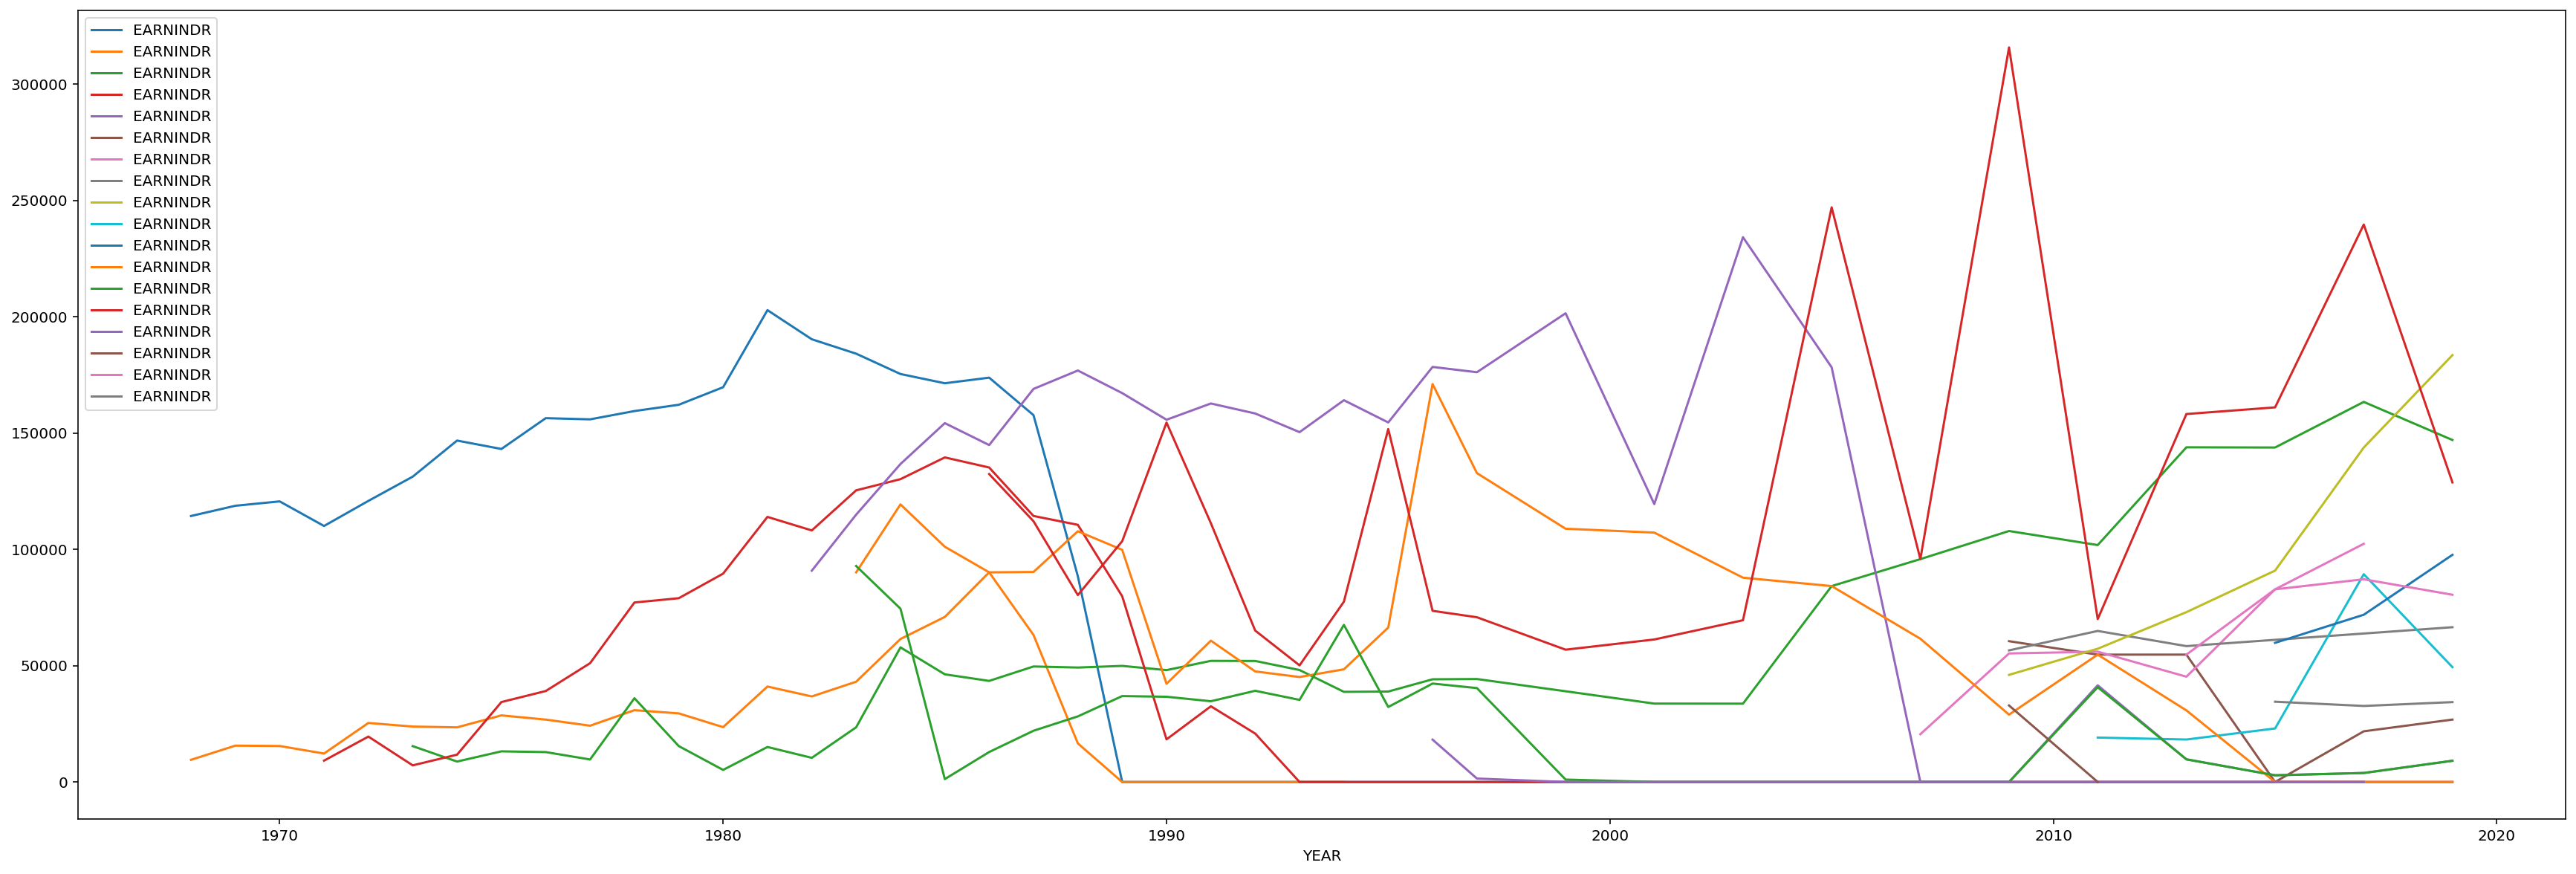

In [78]:
fig, ax = plt.subplots(figsize=(30, 10))

for person_id in incomes_df["ID"].unique():
    incomes_df[incomes_df["ID"] == person_id].plot.line(x="YEAR", y="EARNINDR", ax=ax)
    #ax.set_title(f"ID = {int(person_id)}")
plt.show()

can potentially generate a timeline of events rooted in a head of household with some time series superimposed:
* marriage(s), divorce(s)
* childbirths
* retirement
* death, obviously
* splitting into new households (children move out, go to college, etc.)s